In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [120]:
from sklearn.preprocessing import PowerTransformer, StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
books = pd.read_excel('Data_Train.xlsx')
books.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [258]:
df_test = pd.read_excel('Data_Test.xlsx')
df_test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [4]:
books.shape

(6237, 9)

In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [6]:
books.isna().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [7]:
books.describe()

,Price
count,6237.000000
mean,560.707516
std,690.110657
min,25.000000
25%,249.180000
50%,373.000000
75%,599.000000
max,14100.000000


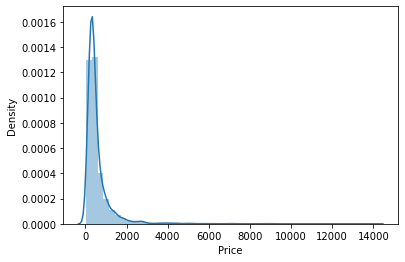

In [8]:
sns.distplot(books.Price)
plt.show()

In [9]:
# Highly right skewed data due to a few expensive books

In [10]:
books.Title.nunique()

5568

In [11]:
books.Author.nunique()

3679

In [12]:
val = books.groupby('Title')['Edition'].value_counts()
val[val > 1]

Title                                                                                          Edition                
10 Minutes a Day Vocabulary Ages 7-11 Key Stage 2 (Made Easy Workbooks)                        Paperback,– 1 Jun 2015     2
100 Bullets Book One                                                                           Paperback,– 4 Nov 2014     2
100 Deadly Skills                                                                              Paperback,– 28 Oct 2016    2
112 Meditations for Self Realization: Vigyan Bhairava Tantra                                   Paperback,– 2014           2
1984                                                                                           Paperback,– 2014           2
                                                                                                                         ..
Your Ad Ignored Here: Cartoons from 15 Years of Marketing, Business, and Doodling in Meetings  Paperback,– 24 Oct 2017    2
Your Prime Mi

In [13]:
books[books.Title == '1984']

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
962,1984,George Orwell,"Paperback,– May 2019",4.4 out of 5 stars,861 customer reviews,"Published in the summer of 1949, George Orwell...",Classic Fiction (Books),Politics,94.0
1850,1984,George Orwell,"Paperback,– 2014",4.5 out of 5 stars,862 customer reviews,Regarded as a great instance of twentieth cent...,Action & Adventure (Books),Action & Adventure,94.0
3800,1984,George Orwell,"Paperback,– 2014",4.5 out of 5 stars,867 customer reviews,Regarded as a great instance of twentieth cent...,Action & Adventure (Books),Action & Adventure,94.0


In [14]:
books.Genre.nunique()

345

# Cleaning

In [29]:
df1 = books.copy()

In [30]:
df1.Edition.str.split(',–')

0       [Paperback,  10 Mar 2016]
1        [Paperback,  7 Nov 2012]
2       [Paperback,  25 Feb 1982]
3        [Paperback,  5 Oct 2017]
4       [Hardcover,  10 Oct 2006]
                  ...            
6232     [Paperback,  8 Aug 2018]
6233    [Paperback,  21 Nov 2016]
6234     [Paperback,  8 Jun 2006]
6235    [Paperback,  15 Jan 2015]
6236    [Paperback,  21 Dec 2016]
Name: Edition, Length: 6237, dtype: object

In [31]:
def cover(x):
    return x.split(',–')[0]

In [32]:
df1['cover_type'] = df1['Edition'].map(cover)

In [259]:
df_test['cover_type'] = df_test['Edition'].map(cover)

In [33]:
df1.cover_type.unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Plastic Comb', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral-bound',
       '(Kannada),Paperback', 'Product Bundle', 'Library Binding',
       '(German),Paperback', 'Leather Bound', '(French),Paperback',
       '(Spanish),Paperback'], dtype=object)

In [34]:
def covers(x):
    return x.split(',')[-1]

In [35]:
df1['cover_type'] = df1.cover_type.map(covers)

In [260]:
df_test['cover_type'] = df_test.cover_type.map(covers)

In [36]:
df1.cover_type.unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Plastic Comb', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral-bound',
       'Product Bundle', 'Library Binding', 'Leather Bound'], dtype=object)

In [37]:
df1.cover_type.value_counts()

Paperback                5197
Hardcover                 823
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Cards                       8
Spiral-bound                4
Tankobon Softcover          3
Loose Leaf                  2
Plastic Comb                1
Perfect Paperback           1
Board book                  1
Product Bundle              1
Library Binding             1
Leather Bound               1
Name: cover_type, dtype: int64

In [38]:
def final_cover(x):
    lst = ['Paperback', 'Hardcover', 'Mass Market Paperback']
    if x not in lst:
        return 'Other'
    else:
        return x

In [39]:
df1.cover_type = df1.cover_type.map(final_cover)
df1.cover_type.value_counts()

Paperback                5197
Hardcover                 823
Mass Market Paperback     155
Other                      62
Name: cover_type, dtype: int64

In [261]:
df_test.cover_type = df_test.cover_type.map(final_cover)

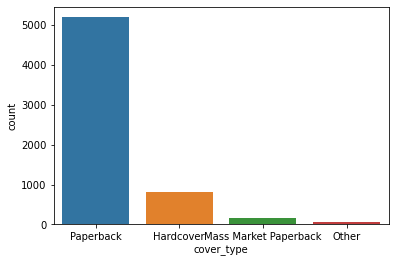

In [43]:
sns.countplot(df1.cover_type)
plt.show()

In [40]:
df1.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,cover_type
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover


In [41]:
def ed_year(x):
    pattern = '\d{4}'
    match = re.findall(pattern, x)
    temp = ''.join(match)
    if temp != '':
        return int(temp)

In [54]:
df1['edition_year'] = df1['Edition'].map(ed_year)

In [262]:
df_test['edition_year'] = df_test['Edition'].map(ed_year)

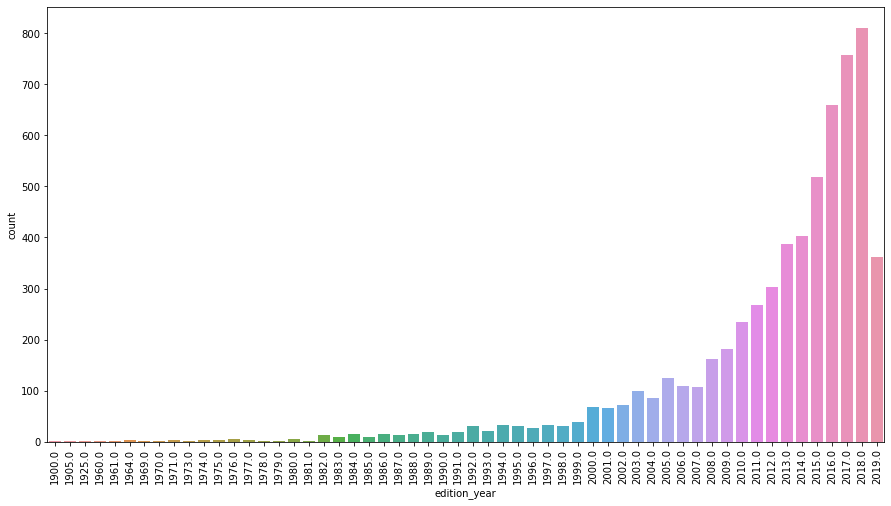

In [55]:
plt.rcParams['figure.figsize'] = [15, 8]
sns.countplot(df1.edition_year)
plt.xticks(rotation=90)
plt.show()

In [266]:
df1.loc[df1['edition_year'].isna(), 'edition_year'] = df1['edition_year'].mode()[0]

In [267]:
df_test.loc[df_test['edition_year'].isna(), 'edition_year'] = df_test['edition_year'].mode()[0]

In [268]:
df1['edition_year_cat'] = pd.cut(df1['edition_year'], bins=[1899, 1981, 1999, 2010, 2020], labels=['Very Old', 'Old', 'Mid', 'New'])

In [269]:
df_test['edition_year_cat'] = pd.cut(df_test['edition_year'], bins=[1899, 1981, 1999, 2010, 2020], labels=['Very Old', 'Old', 'Mid', 'New'])

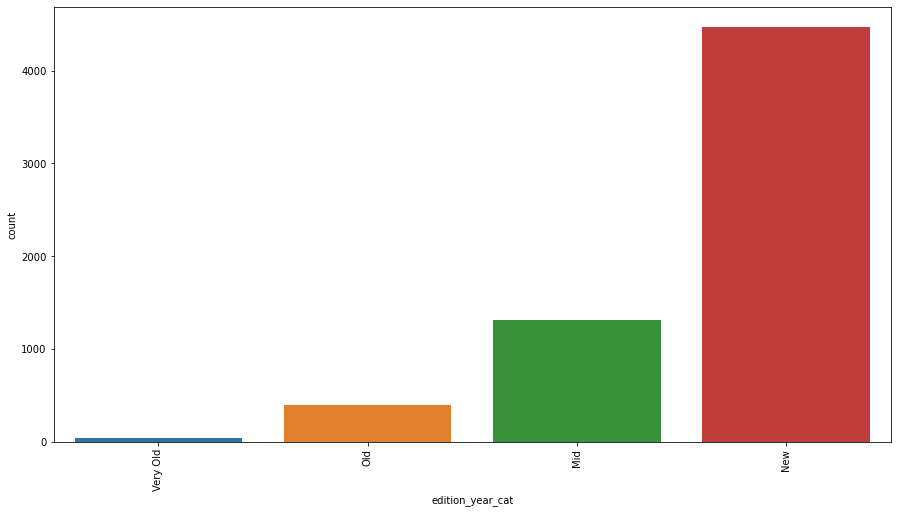

In [67]:
sns.countplot(df1.edition_year_cat)
plt.xticks(rotation=90)
plt.show()

In [61]:
df1.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,cover_type,edition_year,edition_year_cat
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,2016.0,New
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,2012.0,New
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,1982.0,Old
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,2017.0,New
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,2006.0,Mid


In [69]:
df1.loc[df1.edition_year_cat.isna()]

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,cover_type,edition_year,edition_year_cat
169,Long Walk to Freedom: Illustrated Children's e...,Nelson Mandela,"Paperback,– Abridged, Import",5.0 out of 5 stars,2 customer reviews,Long Walk to Freedom by Nelson Mandela is the ...,Action & Adventure (Books),Action & Adventure,418.0,Paperback,NaN,NaN
235,Alfred's Basic Adult All-in-One Course: Lesson...,Willard A. Palmer,"Plastic Comb,– DVD, NTSC",3.9 out of 5 stars,6 customer reviews,Alfred's Basic Adult All-in-One Course is a gr...,Music Books,"Arts, Film & Photography",1453.0,Other,NaN,NaN
582,Fundamentals of Drawing Portraits: A Practical...,Barrington Barber,"Paperback,– Illustrated, Import",4.0 out of 5 stars,7 customer reviews,This book is essential for everyone who wants ...,"Handicrafts, Decorative Arts & Crafts (Books)","Arts, Film & Photography",415.0,Paperback,NaN,NaN
972,"Cartooning, The Professional Step-by-Step Guid...","Ivan Hissey, Curtis Tappenden","Paperback,– Illustrated, Import",3.0 out of 5 stars,1 customer review,A comprehensive and practical guide to drawing...,"Handicrafts, Decorative Arts & Crafts (Books)",Comics & Mangas,445.0,Paperback,NaN,NaN
1233,Amma Tell Me About Raksha Bandhan!,Bhakti Mathur,"Paperback,– Large Print, Import",5.0 out of 5 stars,1 customer review,A promise to love and to protect\nIs sealed by...,Action & Adventure (Books),Action & Adventure,277.0,Paperback,NaN,NaN
1558,Figure it out for Yourself,James Hadley Chase,"Hardcover,– Import, Facsimile",5.0 out of 5 stars,1 customer review,Serena Marshland was the fourth richest woman ...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",100.0,Hardcover,NaN,NaN
1605,"An Introduction to Linguistics: Language, Gram...",Syal,"Paperback,– Abridged, Audiobook, Box set",4.1 out of 5 stars,29 customer reviews,"This compact and engagingly elegant text, now ...",Engineering,"Language, Linguistics & Writing",399.0,Paperback,NaN,NaN
1631,Swimming: Swimming Made Easy: Beginner and Exp...,Ace McCloud,"Paperback,– Large Print, Import",4.0 out of 5 stars,1 customer review,Are you tired of being a weak swimmer? Do less...,"Swimming, Snorkelling & Diving (Books)",Sports,709.0,Paperback,NaN,NaN
1643,The Merchant of Venice (Text with Paraphrase) ...,William Shakespeare,"Paperback,– Student Edition, Special Edition",3.9 out of 5 stars,58 customer reviews,Introduce the students to William Shakespeare’...,Theater,"Arts, Film & Photography",220.0,Paperback,NaN,NaN
1769,The Human Face of Big Data,Rick Smolan,"Hardcover,– Abridged, Audiobook, Box set",5.0 out of 5 stars,1 customer review,The images and stories captured in The Human F...,Computer Science Books,"Computing, Internet & Digital Media",2248.0,Hardcover,NaN,NaN


In [270]:
df1.isna().sum()

Title               0
Author              0
Edition             0
Reviews             0
Ratings             0
Synopsis            0
Genre               0
BookCategory        0
Price               0
cover_type          0
edition_year        0
edition_year_cat    0
dtype: int64

In [70]:
df1.shape

(6237, 12)

In [71]:
df2 = df1.copy()

In [72]:
df2.shape

(6216, 12)

In [73]:
df2['edition_year'] = df2['edition_year'].astype(int)

In [271]:
df_test['edition_year'] = df_test['edition_year'].astype(int)

In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6216 entries, 0 to 6236
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Title             6216 non-null   object  
 1   Author            6216 non-null   object  
 2   Edition           6216 non-null   object  
 3   Reviews           6216 non-null   object  
 4   Ratings           6216 non-null   object  
 5   Synopsis          6216 non-null   object  
 6   Genre             6216 non-null   object  
 7   BookCategory      6216 non-null   object  
 8   Price             6216 non-null   float64 
 9   cover_type        6216 non-null   object  
 10  edition_year      6216 non-null   int32   
 11  edition_year_cat  6216 non-null   category
dtypes: category(1), float64(1), int32(1), object(9)
memory usage: 564.7+ KB


In [75]:
df2.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,cover_type,edition_year,edition_year_cat
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,2016,New
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,2012,New
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,1982,Old
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,2017,New
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,2006,Mid


In [76]:
def reviews(x):
    return float(x[:3])

In [77]:
df2['reviews'] = df2['Reviews'].map(reviews)

In [272]:
df_test['reviews'] = df_test['Reviews'].map(reviews)

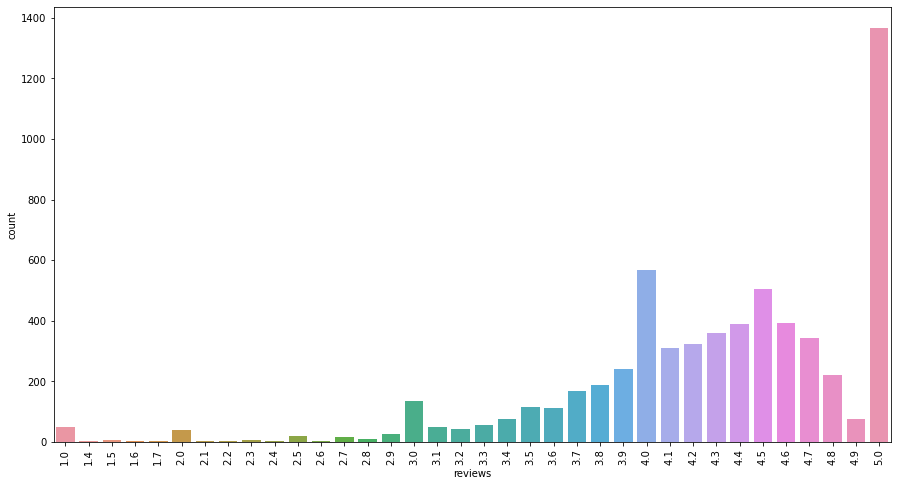

In [79]:
sns.countplot(df2.reviews)
plt.xticks(rotation=90)
plt.show()

In [80]:
def ratings(x):
    lst = []
    for i in x:
        if i.isdigit():
            lst.append(i)
    return float(''.join(lst))

In [81]:
df2['ratings'] = df2['Ratings'].map(ratings)

In [273]:
df_test['ratings'] = df_test['Ratings'].map(ratings)

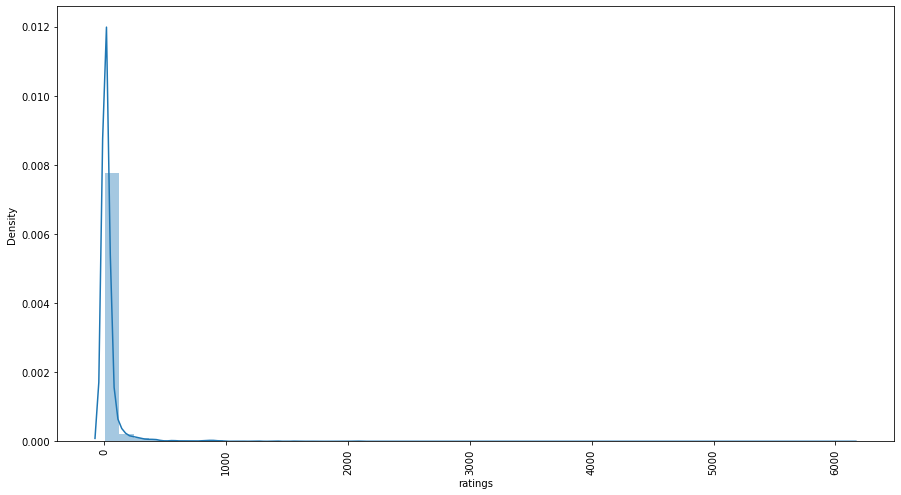

In [83]:
sns.distplot(df2.ratings)
plt.xticks(rotation=90)
plt.show()

In [84]:
df2.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,cover_type,edition_year,edition_year_cat,reviews,ratings
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,2016,New,4.0,8.0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,2012,New,3.9,14.0
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,1982,Old,4.8,6.0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,2017,New,4.1,13.0
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,2006,Mid,5.0,1.0


In [86]:
df2.BookCategory.nunique()

11

In [87]:
df2.Genre.nunique()

345

In [103]:
df2.Genre.value_counts().head(50).index

Index(['Action & Adventure (Books)', 'Romance (Books)',
       'Biographies & Autobiographies (Books)',
       'Crime, Thriller & Mystery (Books)', 'Contemporary Fiction (Books)',
       'Comics & Mangas (Books)', 'Mangas', 'Music Books', 'Humour (Books)',
       'Design', 'Dictionaries', 'Cinema & Broadcast (Books)',
       'Handicrafts, Decorative Arts & Crafts (Books)',
       'Arts History, Theory & Criticism (Books)',
       'Healthy Living & Wellness (Books)', 'Writing Guides (Books)',
       'Language Learning & Teaching (Books)', 'Indian Writing (Books)',
       'Computer Science Books', 'Government (Books)', 'True Accounts (Books)',
       'Comics & Graphic Novels (Books)', 'Sports Training & Coaching (Books)',
       'Language, Linguistics & Writing (Books)', 'Linguistics (Books)',
       'Comics', 'Encyclopaedias & Reference Works (Books)',
       'Software & Business Applications (Books)', 'Asian History',
       'Photography Textbooks', 'Industries & Business Sectors (Book

In [108]:
genres = df2.Genre.value_counts().head(25).index

def genre_cat(x):
    if x not in genres:
        return 'Other'
    else:
        return x
    
df2['genre_cat'] = df2.Genre.map(genre_cat)

In [274]:
df_test['genre_cat'] = df_test.Genre.map(genre_cat)

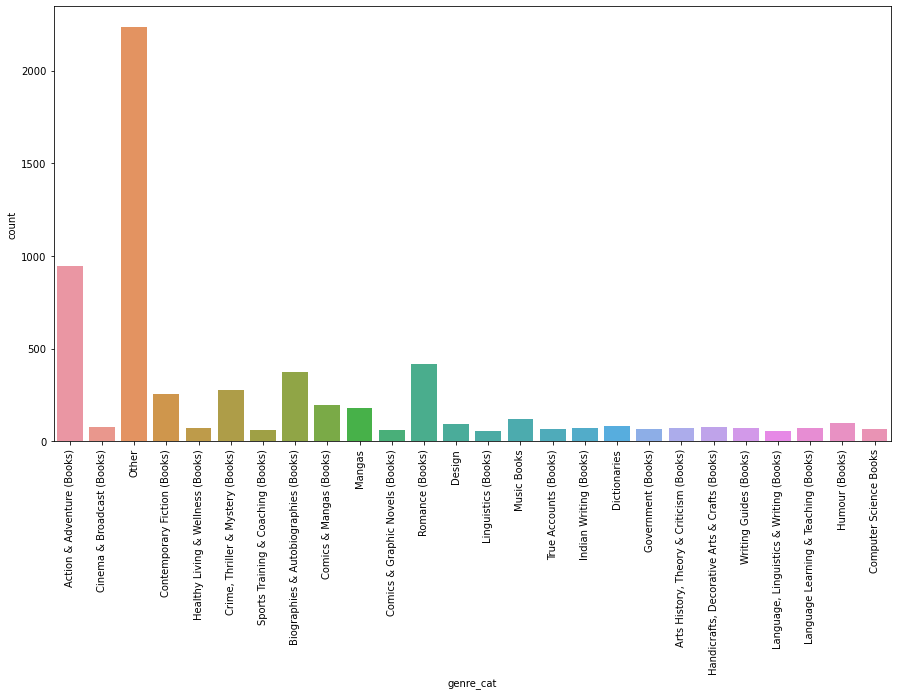

In [109]:
sns.countplot(df2.genre_cat)
plt.xticks(rotation=90)
plt.show()

In [112]:
df2.Author.nunique()

3666

In [111]:
df2.Author.value_counts().head(10)

Agatha Christie    68
Ladybird           49
DK                 48
Albert Uderzo      34
Herge              34
James Patterson    32
John Grisham       30
Bill Watterson     30
P.G. Wodehouse     29
Sidney Sheldon     28
Name: Author, dtype: int64

In [114]:
df2.head(2)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,cover_type,edition_year,edition_year_cat,reviews,ratings,genre_cat
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,2016,New,4.0,8.0,Action & Adventure (Books)
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,2012,New,3.9,14.0,Cinema & Broadcast (Books)


In [116]:
df2['publish_recency'] = 2020 - df2.edition_year

In [275]:
df_test['publish_recency'] = 2020 - df_test.edition_year

In [118]:
df3 = df2.drop(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre', 'edition_year'], axis=1)
df3.head()

,BookCategory,Price,cover_type,edition_year_cat,reviews,ratings,genre_cat,publish_recency
0,Action & Adventure,220.00,Paperback,New,4.0,8.0,Action & Adventure (Books),4
1,"Biographies, Diaries & True Accounts",202.93,Paperback,New,3.9,14.0,Cinema & Broadcast (Books),8
2,Humour,299.00,Paperback,Old,4.8,6.0,Other,38
3,"Crime, Thriller & Mystery",180.00,Paperback,New,4.1,13.0,Contemporary Fiction (Books),3
4,"Arts, Film & Photography",965.62,Hardcover,Mid,5.0,1.0,Other,14


In [276]:
df_test = df_test.drop(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre', 'edition_year'], axis=1)

In [307]:
df3_X = df3.drop('Price', axis=1)

In [308]:
cat_cols = df3_X.select_dtypes(exclude=np.number)
num_cols = df3_X.select_dtypes(include=np.number)

In [309]:
pw = PowerTransformer()
df3_trans = pd.DataFrame(pw.fit_transform(num_cols), columns=num_cols.columns)

sc = StandardScaler()
df3_scaled = pd.DataFrame(sc.fit_transform(df3_trans), columns=df3_trans.columns).reset_index(drop=True)
df3_scaled.shape

(6216, 3)

In [310]:
test_cat_cols = df_test.select_dtypes(exclude=np.number)
test_num_cols = df_test.select_dtypes(include=np.number)

test_trans = pd.DataFrame(pw.transform(test_num_cols), columns=test_num_cols.columns)
test_scaled = pd.DataFrame(sc.transform(test_trans), columns=test_trans.columns).reset_index(drop=True)
test_scaled.shape

(1560, 3)

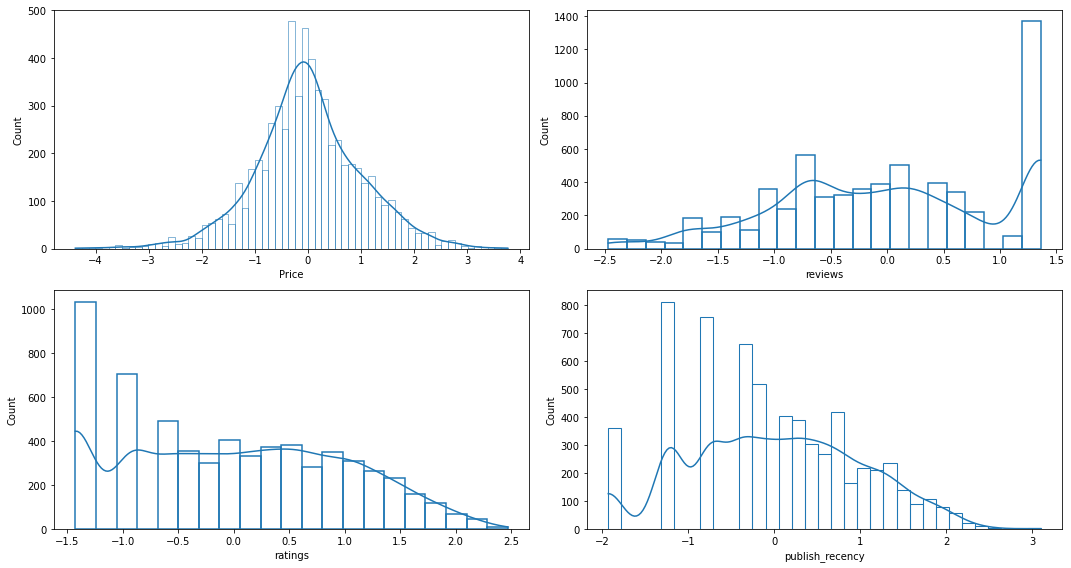

In [123]:
i = 1
for x in df3_scaled:
    plt.subplot(2, 2, i)
    sns.histplot(df3_scaled[x], kde=True, fill=False)
    i += 1
plt.tight_layout()

In [132]:
dummy_df = pd.get_dummies(data=cat_cols, drop_first=True).reset_index(drop=True)
dummy_df.shape

(6216, 41)

In [290]:
test_dummy_df = pd.get_dummies(data=test_cat_cols, drop_first=True).reset_index(drop=True)
test_dummy_df.shape

(1560, 41)

In [ ]:
# from feature_engine.encoding import CountFrequencyEncoder

# fe = CountFrequencyEncoder(encoding_method='frequency')

# author = fe.fit_transform(pd.DataFrame(books_new.Author))

In [ ]:
# books_new.insert(1, 'author_freq', author)

In [311]:
df_final = pd.concat([df3_scaled, dummy_df], axis=1)

In [312]:
test_final = pd.concat([test_scaled, test_dummy_df], axis=1)
test_final.shape

(1560, 44)

In [313]:
df_final.head()

,reviews,ratings,publish_recency,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",...,genre_cat_Language Learning & Teaching (Books),"genre_cat_Language, Linguistics & Writing (Books)",genre_cat_Linguistics (Books),genre_cat_Mangas,genre_cat_Music Books,genre_cat_Other,genre_cat_Romance (Books),genre_cat_Sports Training & Coaching (Books),genre_cat_True Accounts (Books),genre_cat_Writing Guides (Books)
0,-0.689429,0.136997,-0.400415,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.835469,0.525772,0.434099,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.854076,-0.077561,2.113308,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,-0.533950,0.476717,-0.745550,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.360359,-1.429114,1.079317,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [314]:
X = df_final
y = df3['Price']

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [315]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [316]:
lr = LinearRegression()

lr.fit(xtrain, ytrain)

ypred_train = lr.predict(xtrain)
ypred_test = lr.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,ypred_train)), np.sqrt(mean_squared_error(ytest,ypred_test)))
print(r2_score(ytrain, ypred_train), r2_score(ytest, ypred_test))

621.1000321569667 627.612943871112
0.18576229679621925 0.19059224932212548


In [317]:
1 - np.sqrt(np.square(np.log10(ypred_test +1) - np.log10(ytest +1)).mean())

0.6885182825895491

In [320]:
pred_test = pd.DataFrame(lr.predict(test_final), columns=['Price'])
pred_test.to_csv('pred2.csv', index=False)

In [300]:
temp_df = pd.concat([test_scaled, pred_test], axis=1)

In [302]:
temp_df1 = pd.DataFrame(sc.inverse_transform(temp_df), columns=temp_df.columns)

In [303]:
temp_df2 = pd.DataFrame(pw.inverse_transform(temp_df1), columns=temp_df1.columns)
temp_df2.head()

,reviews,ratings,publish_recency,Price
0,4.4,960.0,34.0,-11234.267001
1,5.0,1.0,2.0,6.376844
2,5.0,4.0,9.0,2.181736
3,4.1,11.0,4.0,-1.813177
4,4.4,9.0,9.0,-0.862167


In [306]:
np.abs(temp_df2['Price']).to_csv('pred1.csv', index=False)

In [155]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=5, random_state=42)

dtree.fit(xtrain, ytrain)

pred_train_tree = dtree.predict(xtrain)
pred_test_tree= dtree.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,pred_train_tree)), np.sqrt(mean_squared_error(ytest,pred_test_tree)))
print(r2_score(ytrain, pred_train_tree), r2_score(ytest, pred_test_tree))

0.8627111882719763 0.9089703130689005
0.24856382830726187 0.2035385317477445


In [156]:
1 - np.sqrt(np.square(np.log10(pred_test_tree +1) - np.log10(ytest +1)).mean())

0.643979081298651

In [157]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, oob_score=True, random_state=42)
model_rf.fit(xtrain, ytrain) 

pred_train_rf = model_rf.predict(xtrain)
pred_test_rf = model_rf.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,pred_train_rf)), np.sqrt(mean_squared_error(ytest,pred_test_rf)))
print(r2_score(ytrain, pred_train_rf), r2_score(ytest, pred_test_rf))

0.6877158244553643 0.8370897390441168
0.5224935179716179 0.32452480077170986


In [158]:
1 - np.sqrt(np.square(np.log10(pred_test_rf +1) - np.log10(ytest +1)).mean())

0.6461508249416368

In [160]:
pd.DataFrame({'Feature':xtrain.columns, 'Importance':model_rf.feature_importances_}).sort_values(by='Importance', ascending=False)

,Feature,Importance
1,ratings,0.245408
2,publish_recency,0.119566
0,reviews,0.113852
15,cover_type_Paperback,0.077705
6,"BookCategory_Computing, Internet & Digital Media",0.066297
35,"genre_cat_Language, Linguistics & Writing (Books)",0.052086
13,cover_type_Mass Market Paperback,0.038231
3,"BookCategory_Arts, Film & Photography",0.032952
12,BookCategory_Sports,0.023625
7,"BookCategory_Crime, Thriller & Mystery",0.019346


In [161]:
from xgboost import XGBRegressor

In [163]:
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(xtrain, ytrain) 

pred_train_xgb = model_xgb.predict(xtrain)
pred_test_xgb = model_xgb.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,pred_train_xgb)), np.sqrt(mean_squared_error(ytest,pred_test_xgb)))
print(r2_score(ytrain, pred_train_xgb), r2_score(ytest, pred_test_xgb))

0.5519695236120021 0.8528449181164726
0.6923963852411674 0.2988587749133106


In [164]:
1 - np.sqrt(np.square(np.log10(pred_test_xgb +1) - np.log10(ytest +1)).mean())

0.6182401788713026

### New Iteration

In [167]:
df3.head()

,BookCategory,Price,cover_type,edition_year_cat,reviews,ratings,genre_cat,publish_recency
0,Action & Adventure,220.00,Paperback,New,4.0,8.0,Action & Adventure (Books),4
1,"Biographies, Diaries & True Accounts",202.93,Paperback,New,3.9,14.0,Cinema & Broadcast (Books),8
2,Humour,299.00,Paperback,Old,4.8,6.0,Other,38
3,"Crime, Thriller & Mystery",180.00,Paperback,New,4.1,13.0,Contemporary Fiction (Books),3
4,"Arts, Film & Photography",965.62,Hardcover,Mid,5.0,1.0,Other,14


In [171]:
df2.ratings.describe()

count    6216.000000
mean       35.959620
std       150.125273
min         1.000000
25%         2.000000
50%         7.000000
75%        22.000000
max      6090.000000
Name: ratings, dtype: float64

In [172]:
new1 = df3.drop(['genre_cat'], axis=1)

In [174]:
new1['review_cat'] = pd.cut(df3.reviews, bins=[0.9,2,3,4,5.1], labels=['poor', 'average', 'good', 'excellent'])

In [175]:
new1.head()

,BookCategory,Price,cover_type,edition_year_cat,reviews,ratings,publish_recency,review_cat
0,Action & Adventure,220.00,Paperback,New,4.0,8.0,4,good
1,"Biographies, Diaries & True Accounts",202.93,Paperback,New,3.9,14.0,8,good
2,Humour,299.00,Paperback,Old,4.8,6.0,38,excellent
3,"Crime, Thriller & Mystery",180.00,Paperback,New,4.1,13.0,3,excellent
4,"Arts, Film & Photography",965.62,Hardcover,Mid,5.0,1.0,14,excellent


In [176]:
def rev(x):
    if x == 'poor':
        return 0
    elif x == 'average':
        return 1
    elif x == 'good':
        return 2
    else:
        return 3
    
new1['review_cat'] = new1['review_cat'].map(rev)
new1.head()

,BookCategory,Price,cover_type,edition_year_cat,reviews,ratings,publish_recency,review_cat
0,Action & Adventure,220.00,Paperback,New,4.0,8.0,4,2
1,"Biographies, Diaries & True Accounts",202.93,Paperback,New,3.9,14.0,8,2
2,Humour,299.00,Paperback,Old,4.8,6.0,38,3
3,"Crime, Thriller & Mystery",180.00,Paperback,New,4.1,13.0,3,3
4,"Arts, Film & Photography",965.62,Hardcover,Mid,5.0,1.0,14,3


In [177]:
new1.BookCategory.value_counts()

Action & Adventure                      815
Crime, Thriller & Mystery               721
Biographies, Diaries & True Accounts    593
Language, Linguistics & Writing         591
Comics & Mangas                         581
Romance                                 560
Humour                                  540
Arts, Film & Photography                512
Computing, Internet & Digital Media     509
Sports                                  469
Politics                                325
Name: BookCategory, dtype: int64

In [219]:
from feature_engine.encoding import CountFrequencyEncoder

fe = CountFrequencyEncoder(encoding_method='frequency')

new1['book_freq'] = pd.DataFrame(fe.fit_transform(pd.DataFrame(new1.BookCategory)))

In [220]:
new2 = new1.drop(['edition_year_cat', 'BookCategory', 'review_cat'], axis=1)
new_cat = new2.select_dtypes(exclude=np.number)
new_num = new2.select_dtypes(include=np.number)

In [221]:
new2.head()

,Price,cover_type,reviews,ratings,publish_recency,book_freq
0,220.00,Paperback,4.0,8.0,4,0.131113
1,202.93,Paperback,3.9,14.0,8,0.095399
2,299.00,Paperback,4.8,6.0,38,0.086873
3,180.00,Paperback,4.1,13.0,3,0.115991
4,965.62,Hardcover,5.0,1.0,14,0.082368


In [222]:
pw = PowerTransformer()
new_trans = pd.DataFrame(pw.fit_transform(new_num), columns=new_num.columns)

sc = StandardScaler()
new_scaled = pd.DataFrame(sc.fit_transform(new_trans), columns=new_trans.columns).reset_index(drop=True)
new_scaled.shape

(6216, 5)

In [224]:
new_dummy = pd.get_dummies(new_cat, drop_first=True).reset_index(drop=True)
new_dummy.shape

(6216, 3)

In [225]:
new_final = pd.concat([new_scaled, new_dummy], axis=1)
new_final.head()

,Price,reviews,ratings,publish_recency,book_freq,cover_type_Mass Market Paperback,cover_type_Other,cover_type_Paperback
0,-0.769230,-0.689429,0.136997,-0.400415,1.752181,0,0,1
1,-0.885965,-0.835469,0.525772,0.434099,0.061511,0,0,1
2,-0.337418,0.854076,-0.077561,2.113308,-0.385777,0,0,1
3,-1.061662,-0.533950,0.476717,-0.745550,1.070432,0,0,1
4,1.152425,1.360359,-1.429114,1.079317,-0.629514,0,0,0


In [205]:
# new_final['review_cat'] = new_final['review_cat'].astype(int)

In [226]:
X = new_final.drop("Price", axis=1)
y = new_final['Price']

In [227]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [228]:
lr = LinearRegression()

lr.fit(xtrain, ytrain)

ypred_train = lr.predict(xtrain)
ypred_test = lr.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,ypred_train)), np.sqrt(mean_squared_error(ytest,ypred_test)))
print(r2_score(ytrain, ypred_train), r2_score(ytest, ypred_test))

0.898242922963398 0.9248757720887
0.18539167428324999 0.17542117696904658


In [229]:
1 - np.sqrt(np.square(np.log10(ypred_test +1) - np.log10(ytest +1)).mean())

0.6482664313505662

In [230]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=5, random_state=42)

dtree.fit(xtrain, ytrain)

pred_train_tree = dtree.predict(xtrain)
pred_test_tree= dtree.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,pred_train_tree)), np.sqrt(mean_squared_error(ytest,pred_test_tree)))
print(r2_score(ytrain, pred_train_tree), r2_score(ytest, pred_test_tree))

0.8631947809909812 0.9261220813193086
0.24772115716718568 0.17319736994368207


In [231]:
1 - np.sqrt(np.square(np.log10(pred_test_tree +1) - np.log10(ytest +1)).mean())

0.6503784913294866

In [232]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, oob_score=True, random_state=42)
model_rf.fit(xtrain, ytrain) 

pred_train_rf = model_rf.predict(xtrain)
pred_test_rf = model_rf.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,pred_train_rf)), np.sqrt(mean_squared_error(ytest,pred_test_rf)))
print(r2_score(ytrain, pred_train_rf), r2_score(ytest, pred_test_rf))

0.6645801272212619 0.8605741726852284
0.5540810413426777 0.2860924296975651


In [233]:
1 - np.sqrt(np.square(np.log10(pred_test_rf +1) - np.log10(ytest +1)).mean())

0.6175067133320837

In [234]:
pd.DataFrame({'Feature':xtrain.columns, 'Importance':model_rf.feature_importances_}).sort_values(by='Importance', ascending=False)

,Feature,Importance
3,book_freq,0.330621
1,ratings,0.229900
2,publish_recency,0.202301
0,reviews,0.140234
6,cover_type_Paperback,0.067155
4,cover_type_Mass Market Paperback,0.023341
5,cover_type_Other,0.006449


In [235]:
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(xtrain, ytrain) 

pred_train_xgb = model_xgb.predict(xtrain)
pred_test_xgb = model_xgb.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,pred_train_xgb)), np.sqrt(mean_squared_error(ytest,pred_test_xgb)))
print(r2_score(ytrain, pred_train_xgb), r2_score(ytest, pred_test_xgb))

0.5807386896998284 0.8764852990444085
0.6594955775885244 0.2594495610537394


In [236]:
1 - np.sqrt(np.square(np.log10(pred_test_xgb +1) - np.log10(ytest +1)).mean())

0.6056541745511901

### Another Iteration

In [238]:
df3.head()

,BookCategory,Price,cover_type,edition_year_cat,reviews,ratings,genre_cat,publish_recency
0,Action & Adventure,220.00,Paperback,New,4.0,8.0,Action & Adventure (Books),4
1,"Biographies, Diaries & True Accounts",202.93,Paperback,New,3.9,14.0,Cinema & Broadcast (Books),8
2,Humour,299.00,Paperback,Old,4.8,6.0,Other,38
3,"Crime, Thriller & Mystery",180.00,Paperback,New,4.1,13.0,Contemporary Fiction (Books),3
4,"Arts, Film & Photography",965.62,Hardcover,Mid,5.0,1.0,Other,14


In [ ]:
cat_cols = df3.select_dtypes(exclude=np.number)
num_cols = df3.select_dtypes(include=np.number)

In [297]:
fe = CountFrequencyEncoder(encoding_method='frequency')

cat_freq = pd.DataFrame(fe.fit_transform(cat_cols)).reset_index(drop=True)
df_freq = pd.concat([num_cols.reset_index(drop=True), cat_freq], axis=1)
df_freq.head()

,BookCategory,cover_type,edition_year_cat,genre_cat
0,0.131113,0.833655,0.718790,0.151866
1,0.095399,0.833655,0.718790,0.012548
2,0.086873,0.833655,0.063063,0.359556
3,0.115991,0.833655,0.718790,0.041184
4,0.082368,0.131596,0.211390,0.359556


In [244]:
pw = PowerTransformer()
df_freq_trans = pd.DataFrame(pw.fit_transform(num_cols), columns=df_freq.columns)

sc = StandardScaler()
df_freq_scaled = pd.DataFrame(sc.fit_transform(df_freq_trans), columns=df_freq_trans.columns).reset_index(drop=True)
df_freq_scaled.shape

(6216, 8)

In [246]:
df_freq_scaled.head()

,Price,reviews,ratings,publish_recency,BookCategory,cover_type,edition_year_cat,genre_cat
0,-0.769230,-0.689429,0.136997,-0.400415,1.752181,0.446695,0.625309,0.113172
1,-0.885965,-0.835469,0.525772,0.434099,0.061511,0.446695,0.625309,-1.162012
2,-0.337418,0.854076,-0.077561,2.113308,-0.385777,0.446695,-1.673141,1.228073
3,-1.061662,-0.533950,0.476717,-0.745550,1.070432,0.446695,0.625309,-0.848240
4,1.152425,1.360359,-1.429114,1.079317,-0.629514,-2.237281,-1.572991,1.228073


In [247]:
X = df_freq_scaled.drop("Price", axis=1)
y = df_freq_scaled['Price']

In [248]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [249]:
lr = LinearRegression()

lr.fit(xtrain, ytrain)

ypred_train = lr.predict(xtrain)
ypred_test = lr.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,ypred_train)), np.sqrt(mean_squared_error(ytest,ypred_test)))
print(r2_score(ytrain, ypred_train), r2_score(ytest, ypred_test))

0.9011602588181898 0.9222421293524082
0.18009167086354705 0.180110572329913


In [250]:
1 - np.sqrt(np.square(np.log10(ypred_test +1) - np.log10(ytest +1)).mean())

0.6505372485916416

In [251]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=5, random_state=42)

dtree.fit(xtrain, ytrain)

pred_train_tree = dtree.predict(xtrain)
pred_test_tree= dtree.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,pred_train_tree)), np.sqrt(mean_squared_error(ytest,pred_test_tree)))
print(r2_score(ytrain, pred_train_tree), r2_score(ytest, pred_test_tree))

0.8536967858405587 0.9262586223176136
0.26418518331044305 0.1729535559134897


In [252]:
1 - np.sqrt(np.square(np.log10(pred_test_tree +1) - np.log10(ytest +1)).mean())

0.6294329095792868

In [253]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, oob_score=True, random_state=42)
model_rf.fit(xtrain, ytrain) 

pred_train_rf = model_rf.predict(xtrain)
pred_test_rf = model_rf.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,pred_train_rf)), np.sqrt(mean_squared_error(ytest,pred_test_rf)))
print(r2_score(ytrain, pred_train_rf), r2_score(ytest, pred_test_rf))

0.640083316000783 0.844280258012648
0.5863488360402507 0.3128704281118917


In [254]:
1 - np.sqrt(np.square(np.log10(pred_test_rf +1) - np.log10(ytest +1)).mean())

0.6404430608475502

In [255]:
pd.DataFrame({'Feature':xtrain.columns, 'Importance':model_rf.feature_importances_}).sort_values(by='Importance', ascending=False)

,Feature,Importance
3,BookCategory,0.287597
1,ratings,0.202287
2,publish_recency,0.144738
6,genre_cat,0.136188
0,reviews,0.121154
4,cover_type,0.092350
5,edition_year_cat,0.015686


In [256]:
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(xtrain, ytrain) 

pred_train_xgb = model_xgb.predict(xtrain)
pred_test_xgb = model_xgb.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,pred_train_xgb)), np.sqrt(mean_squared_error(ytest,pred_test_xgb)))
print(r2_score(ytrain, pred_train_xgb), r2_score(ytest, pred_test_xgb))

0.5170188559097187 0.8688578944934163
0.7301179497869146 0.2722824072591443


In [257]:
1 - np.sqrt(np.square(np.log10(pred_test_xgb +1) - np.log10(ytest +1)).mean())

0.6252472993988069